In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import functions as func

In [7]:
from IPython.display import clear_output
from IPython.display import display
from IPython.display import Image
from ipythonblocks import BlockGrid

Base Question:

Replicate Schelling's model. 

First, we have a function that generates a specified nxn grid with fixed numbers of our agent 1 and agent two
that are randomly distributed in the grid

In [8]:
A=func.random_grid(5,10,10) # first we will need a random nxn grid with fixed numbers of agent 1 and agent 2

[[ 0.  2.  2.  1.  2.]
 [ 2.  2.  1.  2.  0.]
 [ 0.  1.  0.  0.  2.]
 [ 1.  2.  2.  2.  1.]
 [ 1.  1.  1.  1.  1.]]


Our function **get_neighbors** takes in the the x,y coordinates of a nxn matrix and outputs the coordinates of its neighbors.

In [9]:
func.get_neighbors(1,1,4) 

[(0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0)]

Using our **get_neighbors** function above and **how_satisfied**, we can determine the satisfaction value
for each element in our list

In [10]:
B=func.how_satisfied(A) 
B

array([[  1.18575755e-322,   8.00000000e-001,   6.00000000e-001,
          4.00000000e-001,   6.66666667e-001],
       [  8.00000000e-001,   7.50000000e-001,   5.00000000e-001,
          7.50000000e-001,   7.41098469e-323],
       [  8.89318163e-323,   5.00000000e-001,   8.39911598e-323,
          1.97626258e-323,   8.00000000e-001],
       [  8.00000000e-001,   3.75000000e-001,   5.00000000e-001,
          5.00000000e-001,   6.00000000e-001],
       [  6.66666667e-001,   6.00000000e-001,   4.00000000e-001,
          6.00000000e-001,   6.66666667e-001]])

Now, we pass a satisfaction threshold of our choice into our function **unsatisfied**. It will output coordinates within our initial A matrix that are currently unsatisfied.

In [11]:
P=6/8 #Percent of satisfaction
C=func.unsatisfied(A,B,P)
C

[(0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (2, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

Final step before we move anything around is to locate where in our A matrix the 0's, our empty spaces, are.

In [12]:
D=func.locate_empty(A)
D

[(0, 0), (1, 4), (2, 0), (2, 2), (2, 3)]

Now we begin swapping the locations of the unsatisfied agents with the available empty spaces

In [13]:
func.relocate(A,P)

array([[ 1.,  2.,  2.,  0.,  0.],
       [ 2.,  2.,  1.,  2.,  1.],
       [ 1.,  1.,  2.,  1.,  2.],
       [ 1.,  2.,  2.,  2.,  1.],
       [ 0.,  1.,  0.,  0.,  1.]])

Using iPythonBlocks:

In [14]:
func.process(A,6/8,1)

,,,,
,,,,
,,,,
,,,,
,,,,


In [15]:
A=func.random_grid(50,1000,1000)

[[ 0.  1.  0. ...,  1.  1.  1.]
 [ 2.  2.  2. ...,  2.  1.  2.]
 [ 2.  2.  1. ...,  1.  2.  2.]
 ..., 
 [ 2.  1.  2. ...,  2.  2.  1.]
 [ 1.  1.  2. ...,  2.  2.  0.]
 [ 1.  1.  2. ...,  2.  2.  2.]]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Initial satisfaction:  0.6232125 Final satisfaction:  0.9769


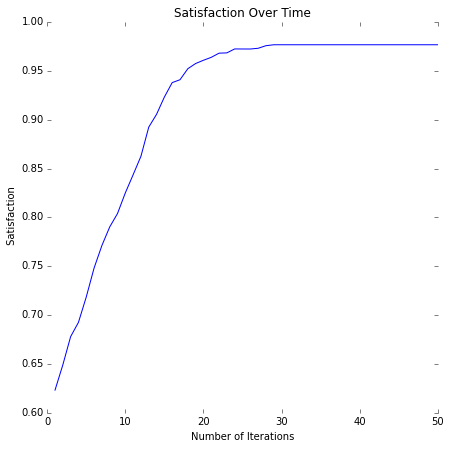

In [16]:
func.plot(A,6/8,50)

And... that's pretty much Schelling's Model.

Now, some additional questions that we may have are:

How would this process be affected if we were to change the parameters P or the vacancy density?

Let us test how the change in P, with a constant high vacancy density will affect the satisfaction.


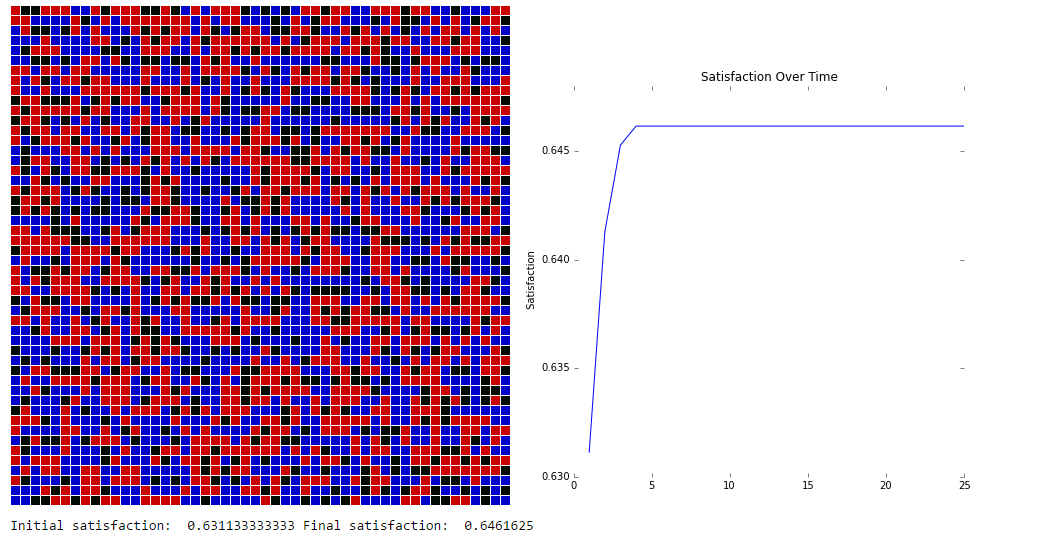

In [17]:
Image(filename='even_small_high.png')

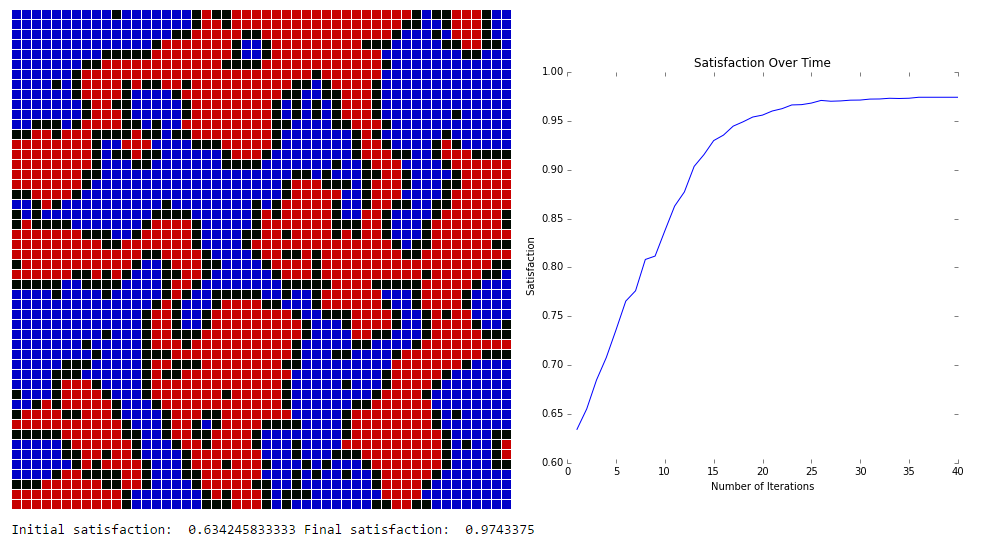

In [18]:
Image(filename='even_six_high.png')

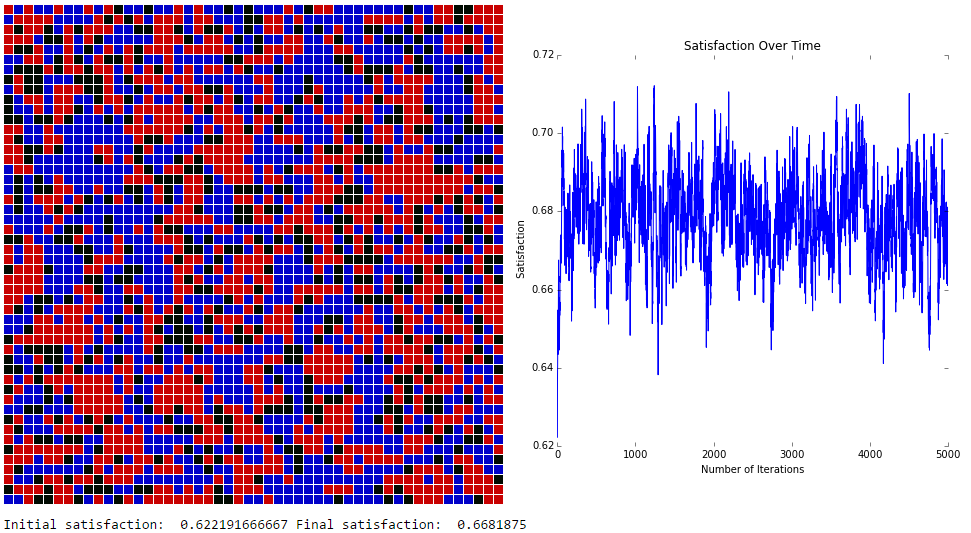

In [19]:
Image(filename='even_seven_high.png')

Now, we can see that the change in satisfaction in the low P is smaller than the one with moderate preference ratio and the one with a smaller preference ratio takes less number of iterations to finish. However, with a very high preference ratio and even with a lot of empty spaces, we would predict that eventually equilibrium would be reached when each agent completely dominate a side of the grid. Unforunately running the process 5000 did not confirm our prediction. I do not have the resources to run the process for too large of a number of steps.

Now, upon further analysis of keeping preference ratio constant and changing the vacancy density, we find that if we increase the vacancy density, the system would reach maximum satisfaction a lot quicker than it would if vacancy density was small.

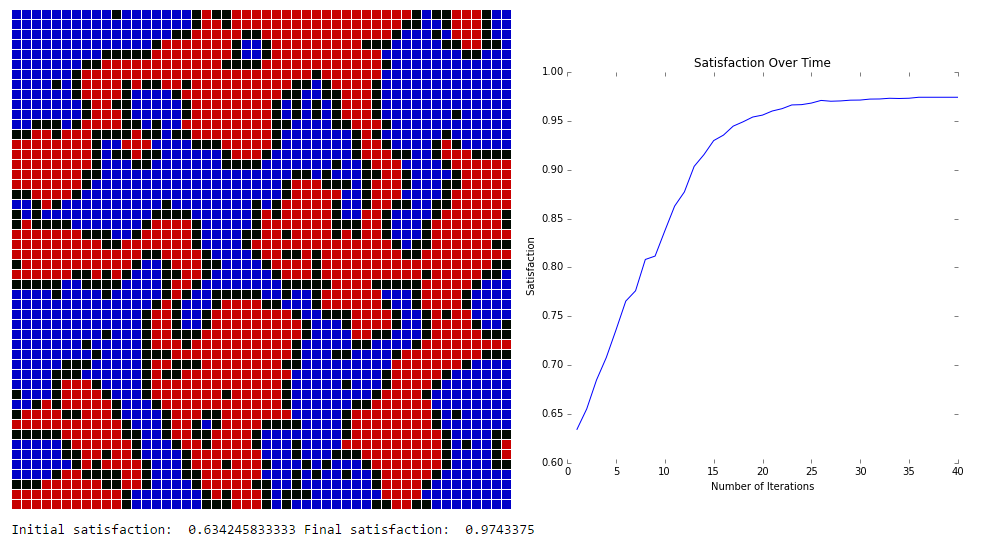

In [20]:
Image(filename='even_six_high.png')

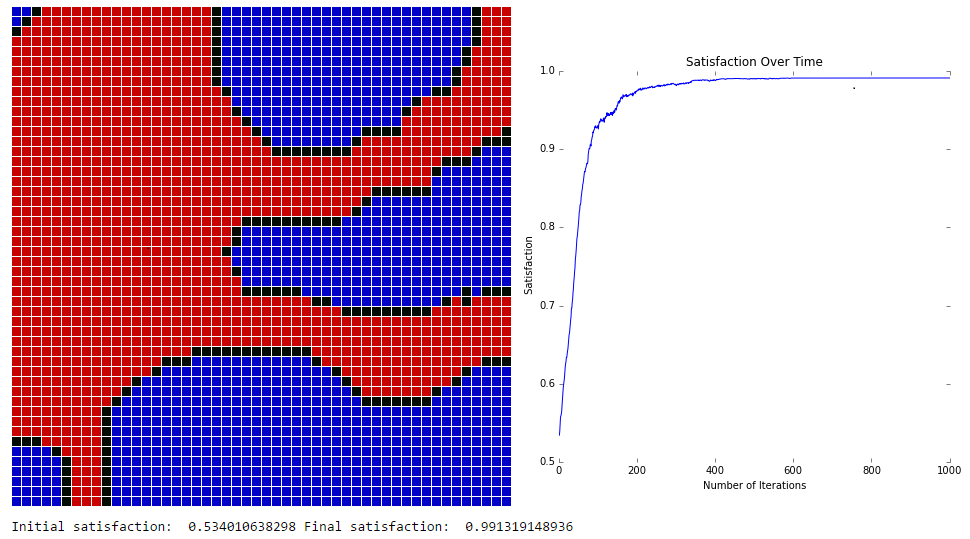

In [21]:
Image(filename='even_six_low.png')

Notice that their change in satisfaction is about the same!

Another additional question:

How would the ratio of the number of each agent affect satisfaction?

If the ratio was something like 3:1...

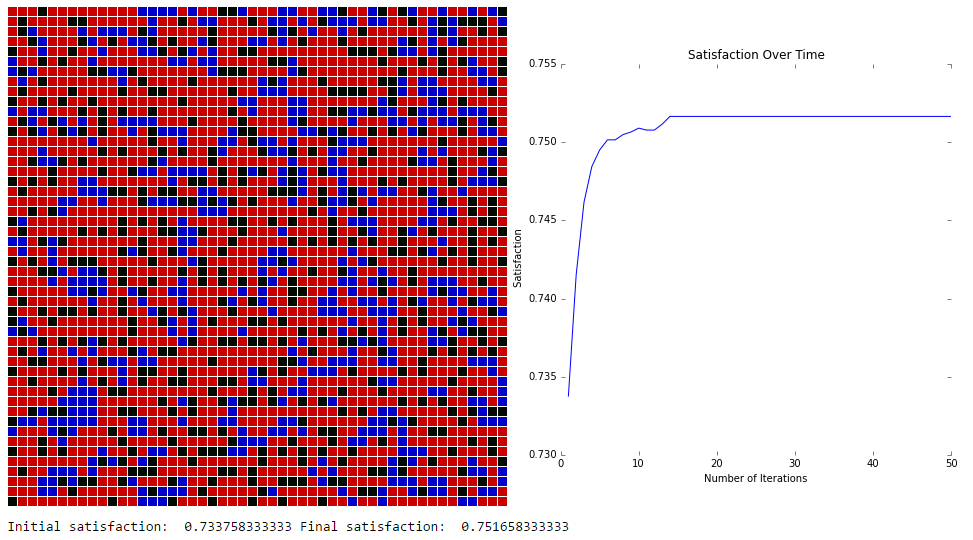

In [22]:
Image(filename='odd_small_high.png')

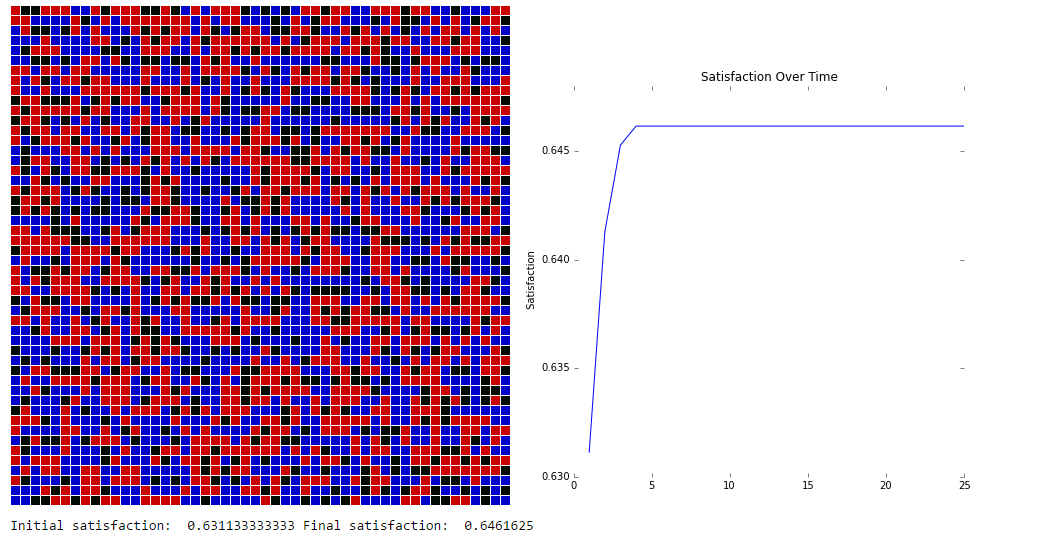

In [23]:
Image(filename='even_small_high.png')

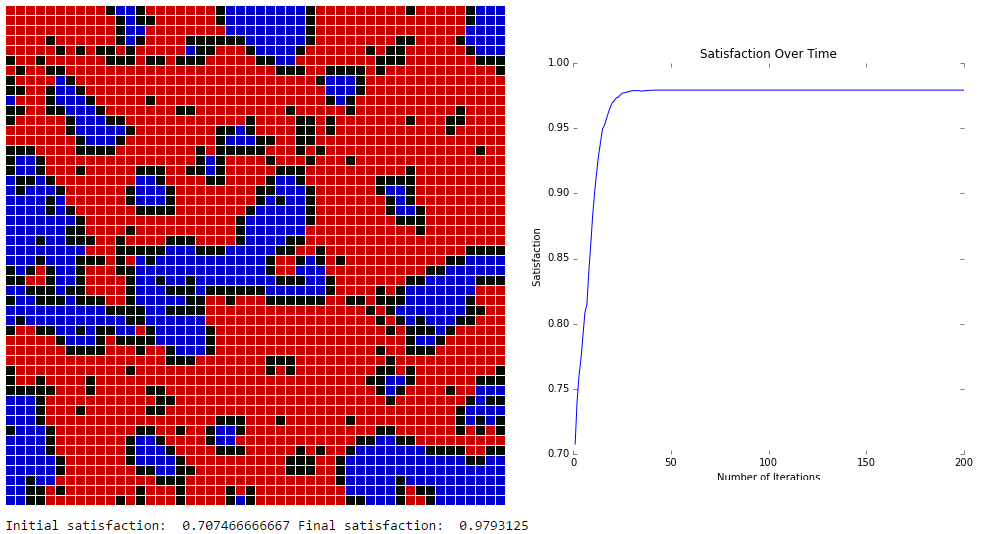

In [24]:
Image(filename='odd_six_high.png')

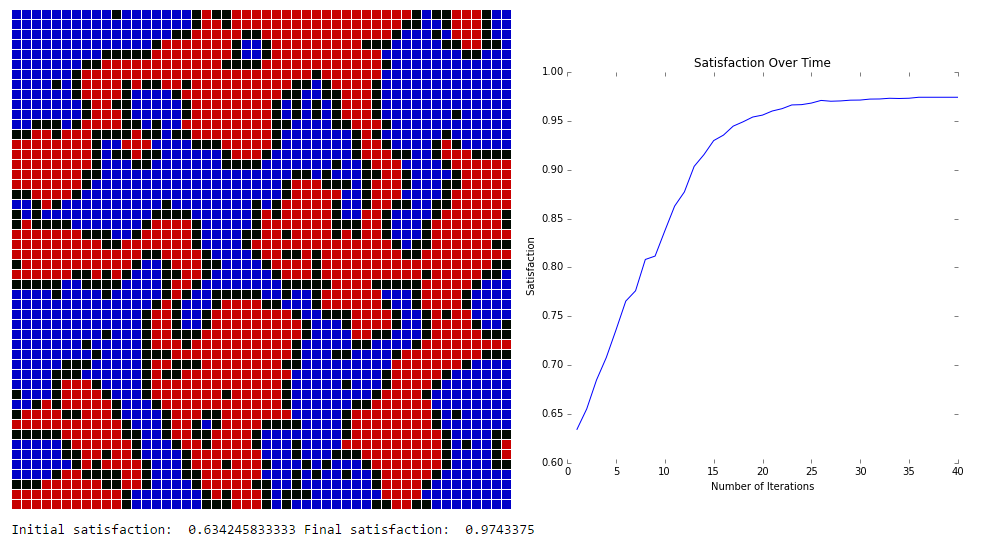

In [25]:
Image(filename='even_six_high.png')

Changing the ratio does not seem to affect the final satisfactions by too much, nor does it affect the change in satisfaction either.

However there is a special case:

In [26]:
A=func.random_grid(50,1650,550)

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  0.  2.]
 [ 2.  2.  1. ...,  0.  1.  1.]
 ..., 
 [ 1.  2.  1. ...,  0.  0.  1.]
 [ 1.  2.  0. ...,  1.  2.  1.]
 [ 0.  2.  1. ...,  1.  1.  1.]]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Initial satisfaction:  0.69490530303 Final satisfaction:  0.901534090909


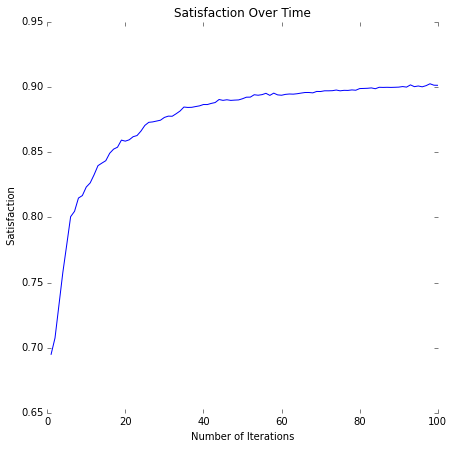

In [27]:
func.plot(A,4/8,100)

Upon observation, we can see that only the smaller population, the blue is moving. It is impossible for this Schelling model to reach equilibrium with these current conditions of have a drastic change of population and low vacancy density.

In conclusion, we can infer some correlations of how changing our parameters will affect our process:

-Increasing preference ratio and vacancy density will lower the amount of iterations required to reach maximum satisfaction.

-The change in satisfaction and its maximum is generally higher for high preference ratios. Except in the case of a ratio of 7/8 and low vacancy density, in which we saw that satifaction never reached a constant value ( This is most likely due to our limited resources).

-For an uneven ratio between agents, there is a special case in which for low vacancy densities, system will never reach its equilibrium.
